## Loading wind field data from selected EURO-CORDEX models: historical and future
#### F. Ferrari, A. Lira-Loarca and A. Mazzino
##### Department of Civil, Chemical and Environmental Engineering. University of Genoa, Italy


This notebook presents the loading of wind field data (u, v) from different EURO-CORDEX GCM-RCMs and calculates wind magnitude and wind energy for the Italian region for the historical period (1979-2005), mid-century (2034-2060) and end-of-century (2074-2100).

The output variables within the dataset are, wind speed in m/s,

\begin{equation}
U_w = \sqrt{u^2 + v^2},
\end{equation}

and the effective wind power, per unit swept area in kW/m$^2$ defined as, 

\begin{equation}
    P_{wind} = \frac{\rho}{2} U_w^3.
\end{equation}


The user should define the `model` that wishes to analyze.

The available EURO-CORDEX models are:
1. CLMcom_CanESM2
2. CLMcom_MIROC5
3. SMHI_MPI-ESM-LR
4. SMHI_NorESM1-M
5. SMHI_CNRM-CM5
6. SMHI_IPSL-CM5A-MR
7. SMHI_HadGEM2-ES
8. SMHI_EC-EARTH
9. DMI_EC-EARTH
10. DMI_NorESM1-M
11. DMI_HadGEM2-ES
12. DMI_MPI-ESM-LR
13. DMI_CNRM-CM5
14. DMI_IPSL-CM5A-MR
15. CLMcom-ETH_EC-EARTH
16. CLMcom-ETH_NorESM1-M
17. CLMcom-ETH_HadGEM2-ES
18. RACMO22E-CNRM-CM5
19. RACMO22E-IPSL-CM5A-MR
20. RACMO22E-HadGEM2-ES

This notebook assumes that the data is located within the directory: 

`dir_base_cordex = /vhe/nasmetocean/wavewatch/cordex`

and that the local folder structure follows the EURO-CORDEX structures:

`dir_base_cordex / wind / historical / GCM-RCM-name`

If the user wishes to change this, it can be defined in the `utils.py` script

In [1]:
# SELECT GCM-RCM
model = 15

In [2]:
import xarray as xr
from pathlib import Path
import hvplot.xarray
import numpy as np

from utils import get_ds_cordex
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('error', category=DeprecationWarning)

In [3]:
from dask.distributed import Client
n_workers = 20
client = Client(n_workers=n_workers, threads_per_worker=2)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 20
Total threads: 40,Total memory: 125.55 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36155,Workers: 20
Dashboard: http://127.0.0.1:8787/status,Total threads: 40
Started: Just now,Total memory: 125.55 GiB
Comm: tcp://127.0.0.1:39309,Total threads: 2
Dashboard: http://127.0.0.1:45043/status,Memory: 6.28 GiB
Nanny: tcp://127.0.0.1:35021,


In [ ]:
ds_hist = get_ds_cordex(model, case='historical')

In [10]:
ds_hist

<xarray.Dataset>
Dimensions:       (time: 39448, rlon: 109, rlat: 118)
Coordinates:
  * time          (time) datetime64[ns] 1979-01-01 ... 2005-12-31T18:00:00
  * rlon          (rlon) float64 -9.895 -9.785 -9.675 ... 1.765 1.875 1.985
  * rlat          (rlat) float64 -14.9 -14.8 -14.69 ... -2.255 -2.145 -2.035
    height        float64 10.0
    lon           (rlat, rlon) float64 dask.array<chunksize=(118, 109), meta=np.ndarray>
    lat           (rlat, rlon) float64 dask.array<chunksize=(118, 109), meta=np.ndarray>
Data variables:
    rotated_pole  (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b'' b''
    uw            (time, rlat, rlon) float32 dask.array<chunksize=(1, 118, 109), meta=np.ndarray>
    wind_energy   (time, rlat, rlon) float32 dask.array<chunksize=(1, 118, 109), meta=np.ndarray>
Attributes: (12/26)
    Conventions:                    CF-1.4
    conventionsURL:                 http://www.cfconventions.org
    title:                          CLMcom-ETH-COSMO-crCLIM-v1-1 model output...
    project_id:                     CORDEX
    driving_model_id:               ICHEC-EC-EARTH
    driving_experiment_name:        historical
    ...                             ...
    source:                         Climate Limited-area Modelling Community ...
    references:                     http://cordex.clm-community.eu/
    product:                        output
    frequency:                      6hr
    tracking_id:                    04fc4a0a-3173-11eb-872f-d094663067f9
    creation_date:                  2020-11-28 13:12:43

In [5]:
ds_mid_rcp85, ds_end_rcp85 = get_ds_cordex(model, case='rcp85')
ds_end_rcp85

<xarray.Dataset>
Dimensions:       (time: 39444, rlon: 109, rlat: 118)
Coordinates:
  * time          (time) datetime64[ns] 2074-01-01 ... 2100-12-31T18:00:00
  * rlon          (rlon) float64 -9.895 -9.785 -9.675 ... 1.765 1.875 1.985
  * rlat          (rlat) float64 -14.9 -14.8 -14.69 ... -2.255 -2.145 -2.035
    height        float64 10.0
    lon           (rlat, rlon) float64 dask.array<chunksize=(118, 109), meta=np.ndarray>
    lat           (rlat, rlon) float64 dask.array<chunksize=(118, 109), meta=np.ndarray>
Data variables:
    rotated_pole  (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b'' b''
    uw            (time, rlat, rlon) float32 dask.array<chunksize=(1, 118, 109), meta=np.ndarray>
    wind_energy   (time, rlat, rlon) float32 dask.array<chunksize=(1, 118, 109), meta=np.ndarray>
Attributes: (12/26)
    Conventions:                    CF-1.4
    conventionsURL:                 http://www.cfconventions.org
    title:                          CLMcom-ETH-COSMO-crCLIM-v1-1 model output...
    project_id:                     CORDEX
    driving_model_id:               ICHEC-EC-EARTH
    driving_experiment_name:        rcp85
    ...                             ...
    source:                         Climate Limited-area Modelling Community ...
    references:                     http://cordex.clm-community.eu/
    product:                        output
    frequency:                      6hr
    tracking_id:                    345cb20e-567a-11eb-8637-80000208fe80
    creation_date:                  2021-01-14 16:07:22

### Seasonal Means

In [6]:
ds_hist_means = ds_hist.groupby('time.season').mean()
ds_mid_rcp85_means = ds_mid_rcp85.groupby('time.season').mean()
ds_end_rcp85_means = ds_end_rcp85.groupby('time.season').mean()

In [7]:
ds_hist_means

<xarray.Dataset>
Dimensions:      (rlon: 109, rlat: 118, season: 4)
Coordinates:
  * rlon         (rlon) float64 -9.895 -9.785 -9.675 ... 1.765 1.875 1.985
  * rlat         (rlat) float64 -14.9 -14.8 -14.69 ... -2.255 -2.145 -2.035
    height       float64 10.0
    lon          (rlat, rlon) float64 dask.array<chunksize=(118, 109), meta=np.ndarray>
    lat          (rlat, rlon) float64 dask.array<chunksize=(118, 109), meta=np.ndarray>
  * season       (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    uw           (season, rlat, rlon) float32 dask.array<chunksize=(1, 118, 109), meta=np.ndarray>
    wind_energy  (season, rlat, rlon) float32 dask.array<chunksize=(1, 118, 109), meta=np.ndarray>
Attributes: (12/26)
    Conventions:                    CF-1.4
    conventionsURL:                 http://www.cfconventions.org
    title:                          CLMcom-ETH-COSMO-crCLIM-v1-1 model output...
    project_id:                     CORDEX
    driving_model_id:               ICHEC-EC-EARTH
    driving_experiment_name:        historical
    ...                             ...
    source:                         Climate Limited-area Modelling Community ...
    references:                     http://cordex.clm-community.eu/
    product:                        output
    frequency:                      6hr
    tracking_id:                    04fc4a0a-3173-11eb-872f-d094663067f9
    creation_date:                  2020-11-28 13:12:43

Plot of the historical Winter (DJD) means:

CPU times: user 33.8 s, sys: 1.52 s, total: 35.3 s
Wall time: 34.4 s


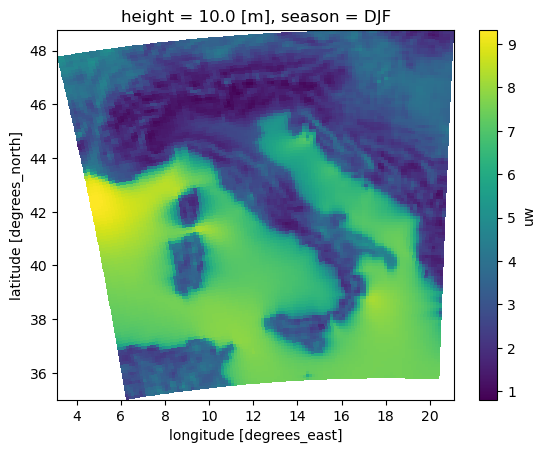

In [11]:
%%time
ds_hist_means.uw.sel(season='DJF').plot(x='lon', y='lat')

Plot of the future changes for Winter (DJD) means for end-of-century (2074-2100):

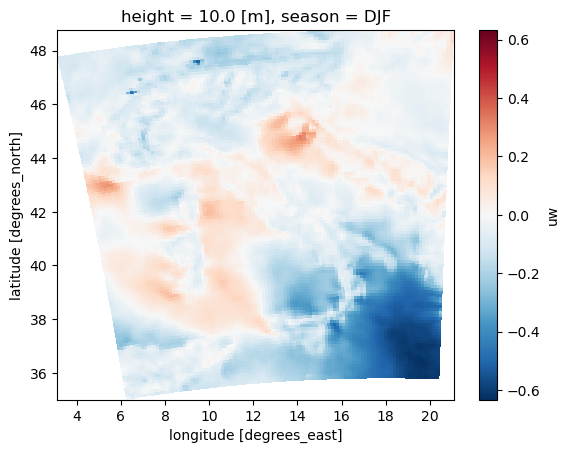

In [9]:
(ds_end_rcp85_means - ds_hist_means).uw.sel(season='DJF').plot(x='lon', y='lat')